In the Perceptron Trick. we pull the line toward the point. Means there is only saying of mis-classified point.

But in Sigmoid Function we take the say of all the correctly classified point to push the line away from them.


In Perceptron Trick we use this Equation to update the Values.
w(new) = w(old) + lr*(y_i-y_hat_i)*X_i

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

(-3.0, 2.0)

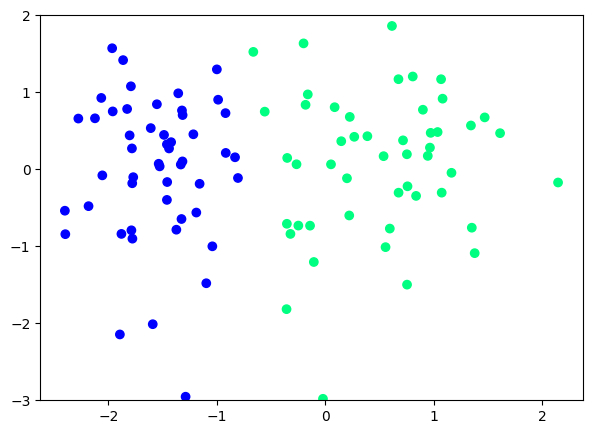

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.ylim(-3,2)

In [4]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

def step(z):
  return 1 if z > 0 else 0

In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(coef_)
print(intercept_)

[1.3956201  0.10355974]
0.9


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

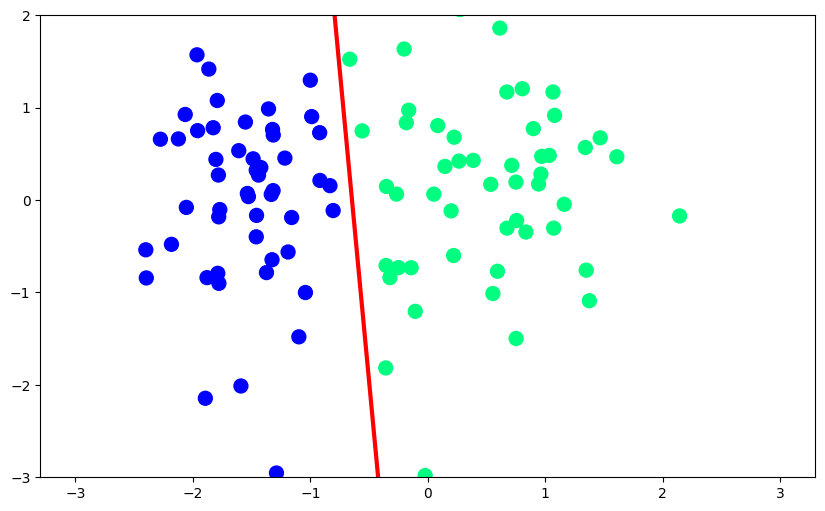

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [10]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [11]:

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [12]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

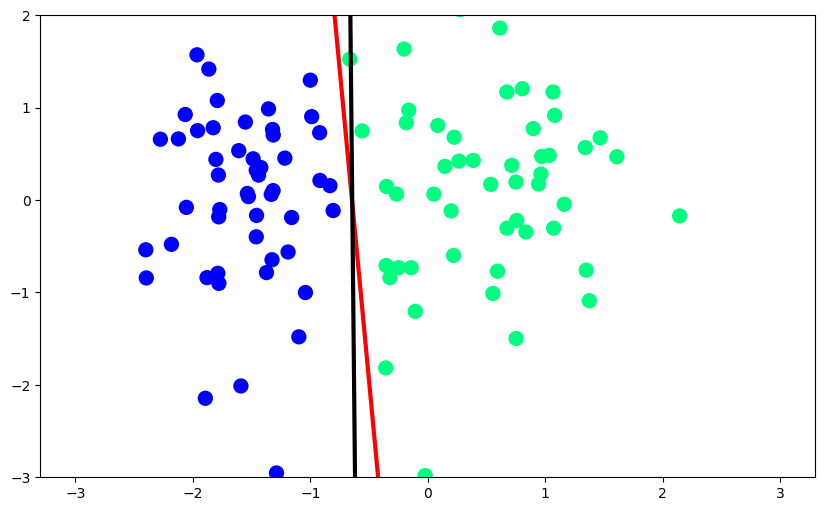

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [19]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0] , weights[1:]

def sigmoid(z):
  return 1/(1+ np.exp(-z))

perceptron(X,y)


(np.float64(2.566348357575683), array([4.54659031, 0.19871566]))

In [20]:
intercept_ , coef_ = perceptron(X,y)

In [21]:
intercept_ , coef_

(np.float64(2.7257454774714214), array([ 4.54853591, -0.03212598]))

In [22]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_ / coef_[1])

m , b

(np.float64(141.5843684429791), np.float64(84.84553255173827))

In [23]:
x_input2 = np.linspace(-3,3,1000)
y_input2 = m * x_input2 + b

(-3.0, 2.0)

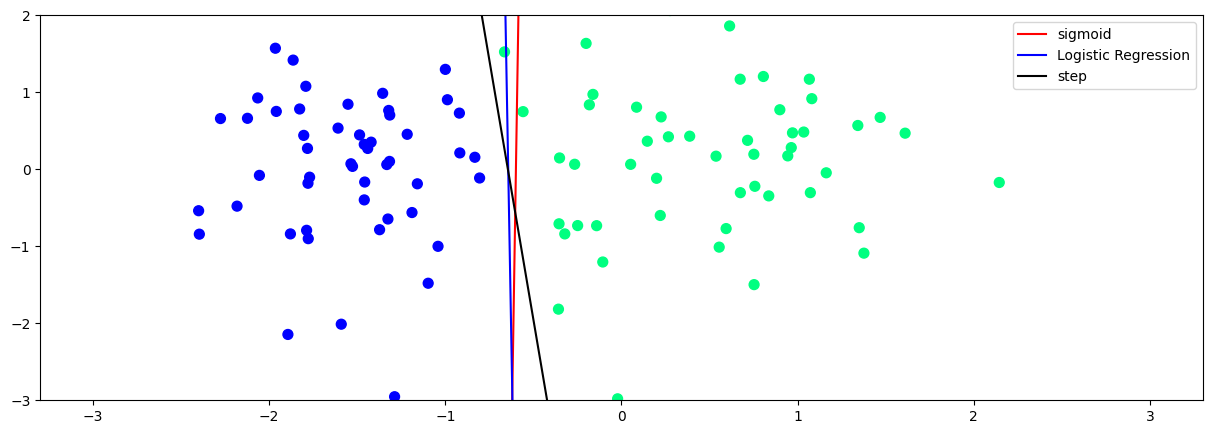

In [33]:
plt.figure(figsize=(15,5))
plt.plot(x_input2,y_input2,color="red",label="sigmoid")
plt.plot(x_input1,y_input1,color="blue",label="Logistic Regression")
plt.plot(x_input,y_input,color="black",label="step")
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=50)
plt.legend()
plt.ylim(-3,2)